This homework is based off a notebook. 
1. You will alter this as need for your results / questions. 
2. When you've successfully run them on a colab, download as an .ipynb and submit on the LMS.

Make certain you are on a GPU Runtime first, by going to Runtime and selecting "Change Runtime Type", and then choosing Hardware Accelerator as GPU.

In this homework, you will build an emotion classifier based on a Huggingface emotions dataset.

You will need to install 🤗 Transformers, numpy and 🤗 Datasets. Run the following three cells.

In [ ]:
pip install datasets==1.3.0

     |████████████████████████████████| 184kB 6.0MB/s 
     |████████████████████████████████| 112kB 30.5MB/s 
     |████████████████████████████████| 245kB 40.3MB/s 


In [ ]:
pip install transformers==4.3.2

     |████████████████████████████████| 1.8MB 5.8MB/s 
     |████████████████████████████████| 890kB 28.8MB/s 
     |████████████████████████████████| 3.2MB 23.3MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=387d4f9360139695e0ea06c8e13b894828334e41cdfecaef3252b515de26de4e
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
pip install numpy==1.20.1

     |████████████████████████████████| 15.3MB 179kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [ ]:
from datasets import load_dataset
from datasets import ClassLabel, Value
emotions_dataset = load_dataset('go_emotions', 'simplified')

accuracies = []


Dataset go_emotions downloaded and prepared to /root/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/ef1c18ea192c771555f1e0d638889dd5f1896255782c57c6a0b934d5f94f779e. Subsequent calls will reuse this data.


To get a sense of what the data looks like, the following function will show some examples picked randomly in the dataset.

In [ ]:
import datasets
import random
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt



def show_random_elements(dataset, num_examples=10):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)
    
    df = pd.DataFrame(dataset[picks])

    for column, typ in dataset.features.items():
        if isinstance(typ, datasets.ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
   
   
    display(HTML(df.to_html()))

In [ ]:
# For simplicity, train model with single label for item.

restricted_dataset = emotions_dataset.filter(lambda x: len(x["labels"]) == 1 and 27 not in x['labels'])
print(len(restricted_dataset['train']))
#print(len(emotions_dataset['train']))

df = pd.DataFrame(restricted_dataset['train'])
df['labels'] =  '[0]'

#restricted_dataset['train']['labels'] =  df['labels']
 
# new_features = restricted_dataset.features.copy()
# new_features["labels"] = ClassLabel(names=['negative', 'positive'])
# new_features["idx"] = Value('int64')
# dataset = dataset.cast(new_features)


column = df["labels"]
max_index = column.max()

restricted_dataset['train']['labels'][1] = [1]
#print(restricted_dataset['train'])

trainSet = restricted_dataset['train']
print(trainSet['labels'])


# for i in range(len(restricted_dataset['train']['labels'])-1):
  # restricted_dataset['train']['labels'][i]

# for label in restricted_dataset['train']['labels']:
#   print(label)

print(restricted_dataset['train'].features.items())

#show_random_elements(restricted_dataset['train'])








23485
[[2], [14], [3], [26], [15], [0], [6], [5], [3], [15], [2], [12], [2], [15], [2], [6], [6], [17], [0], [25], [10], [20], [4], [10], [15], [12], [13], [1], [0], [3], [0], [1], [13], [4], [25], [4], [25], [9], [4], [24], [18], [4], [7], [7], [0], [3], [10], [5], [15], [0], [22], [17], [2], [2], [3], [26], [7], [2], [15], [11], [9], [22], [2], [13], [9], [15], [23], [1], [15], [0], [14], [18], [3], [5], [0], [14], [18], [20], [0], [0], [17], [26], [7], [15], [0], [10], [17], [7], [4], [2], [3], [4], [11], [18], [7], [7], [17], [15], [0], [4], [18], [6], [26], [25], [0], [25], [0], [20], [7], [17], [11], [4], [6], [10], [6], [7], [4], [4], [1], [0], [25], [10], [7], [1], [3], [25], [5], [9], [1], [18], [1], [15], [3], [15], [11], [9], [26], [9], [15], [15], [4], [7], [6], [4], [14], [10], [1], [17], [21], [0], [20], [3], [10], [1], [22], [25], [20], [1], [7], [26], [3], [1], [1], [10], [15], [1], [26], [3], [14], [3], [0], [1], [16], [7], [3], [20], [11], [26], [13], [15], [17], [18


The emotions are provided as numeric labels. These are the actual orderings, beginning at 0 for admiration:

In [ ]:
labels = ["admiration", "amusement", "anger", "annoyance", "approval", "caring", 
          "confusion", "curiosity", "desire", "disappointment", "disapproval",
          "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief",
          "joy", "love", "nervousness", "optimism", "pride", "realization",
          "relief", "remorse", "sadness", "surprise", "neutral"]   # 28 emotions are there.

labelsPositiveNegative = ["Neutral","Positive","Negative"]

# labelsPositive = ["admiration","amusement","approval","caring","curiosity","excitement",
#                   "gratitude","joy","love","optimism","pride","realization","surprise"]
                  
# labelsNegative = ["anger","annoyance","disappointment","disapproval","disgust","fear","remorse","embarrassment"]

# labelsNeutral = ["confusion","desire","grief","nervousness","sadness","neutral"]


labelsPositive = ["admiration","amusement","approval","caring","curiosity","excitement",
                  "gratitude","joy","love","optimism","pride","realization","surprise"]
                  
labelsNegative = ["anger","annoyance","disappointment","disapproval","disgust","fear","remorse","embarrassment"]
labelsNeutral = ["confusion","desire","grief","nervousness","sadness","neutral"]


index_to_labels = {index: label for index, label in enumerate(labels)}
index_to_labels_positive_negative = {index: label for index, label in enumerate(labelsPositiveNegative)}

## Preprocessing the data

Before we can feed those texts to our model, we need to preprocess them. This is done by a 🤗 Transformers `Tokenizer` which will (as the name indicates) tokenize the inputs (including converting the tokens to their corresponding IDs in the pretrained vocabulary) and put it in a format the model expects, as well as generate the other inputs that model requires.

To do all of this, we instantiate our tokenizer with the `AutoTokenizer.from_pretrained` method, which will ensure:

- we get a tokenizer that corresponds to the model architecture we want to use,
- we download the vocabulary used when pretraining this specific checkpoint.

That vocabulary will be cached, so it's not downloaded again the next time we run the cell.

In [ ]:
from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer

model_name = "distilbert-base-uncased" #'distilbert-base-uncased' #albert-base-v2
config = AutoConfig.from_pretrained(model_name, num_labels=3)
model = AutoModelForSequenceClassification.from_config(config=config)
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

We pass along `use_fast=True` to the call above to use one of the fast tokenizers (backed by Rust) from the 🤗 Tokenizers library. Those fast tokenizers are available for almost all models, but if you got an error with the previous call, remove that argument.

In [ ]:
#Remember to check if names could be changed.

def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True)

def convert_labels_to_int(example):
    example['labels'] = example['labels'][0]
    
    #example['labels'] = 0

    prediction_str = index_to_labels[example['labels']]
    if prediction_str in labelsPositive:
      example['labels'] = 1
    elif prediction_str in labelsNegative:
      example['labels'] = 2
    else:
      example['labels'] = 0

      
    return example

encoded_dataset = restricted_dataset.map(preprocess_function, batched=True)
encoded_dataset = encoded_dataset.map(convert_labels_to_int)

#encoded_dataset = encoded_dataset.filter(lambda x: x["labels"] == 1 and 2 in x['labels'])


show_random_elements(encoded_dataset['train'])
print(restricted_dataset['train'].features.items())

#print(encoded_dataset)


,attention_mask,id,input_ids,labels,text
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",eev6obc,"[101, 1045, 13675, 10696, 12264, 1998, 17490, 12136, 2035, 100, 1996, 100, 4365, 100, 2051, 1012, 1045, 2228, 2026, 2303, 2113, 2027, 1521, 2128, 10250, 10050, 2063, 1998, 26780, 9742, 100, 102]",0,I crave nuts and nut butter all 👏 the 👏 damn 👏 time. I think my body know they’re calorie and nutrient dense 😂
1,"[1, 1, 1, 1, 1, 1, 1]",ee1lj8m,"[101, 4283, 2005, 1996, 18140, 1012, 102]",1,thanks for the correction.
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",edm9boe,"[101, 3348, 14421, 1013, 13507, 2024, 6069, 5672, 2068, 2151, 2185, 1012, 6057, 2008, 1012, 2184, 2086, 3283, 6343, 2052, 2031, 2245, 2008, 3348, 3667, 2052, 2022, 2999, 2011, 13507, 1012, 102]",1,Sex dolls/robots are gonna replace them any away. Funny that. 10 years ago nobody would have thought that sex workers would be replaced by robots.
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",edqqvhq,"[101, 1028, 2021, 2009, 2758, 6555, 2157, 1999, 2037, 2171, 1012, 1012, 1012, 1012, 2182, 1005, 1055, 1037, 3376, 2611, 2005, 2017, 1012, 1012, 1012, 1034, 1034, 1013, 1055, 102]",1,> But it says progressive right in their name.... Here's a beautiful girl for you... ^^/s
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",ed8wbdn,"[101, 4365, 7858, 1998, 19006, 3689, 2003, 3565, 21115, 2005, 2417, 23194, 102]",1,Damn youtube and outrage drama is super lucrative for reddit
5,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",edrrqxr,"[101, 2054, 1037, 9467, 1012, 1012, 1012, 2016, 2001, 4458, 2428, 2092, 2205, 1012, 1012, 1012, 102]",2,What a shame... she was passing really well too...
6,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",eem4t9e,"[101, 2009, 2003, 11757, 4795, 2029, 2003, 2339, 2045, 2024, 8390, 2005, 2023, 1010, 2036, 2122, 8390, 2224, 1037, 25653, 1998, 2025, 1037, 3829, 5442, 102]",1,"It is incredibly dangerous which is why there are professionals for this, also these professionals use a saber and not a kitchen knife"
7,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",eew5ddv,"[101, 15624, 1010, 2049, 2145, 2051, 2241, 2061, 3083, 2097, 2022, 7078, 10958, 6834, 2009, 1999, 102]",1,"yep, its still time based so 1st will be absolutely raking it in"
8,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",edn8upi,"[101, 2017, 2034, 999, 2191, 2009, 2062, 5875, 2084, 2023, 999, 102]",1,You first! Make it more interesting than this!
9,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",ednyo7p,"[101, 2339, 2025, 1029, 3061, 2000, 2033, 3475, 1521, 1056, 2004, 2673, 1045, 2342, 2003, 2006, 1996, 2723, 8840, 2140, 102]",1,why not? standing to me isn’t as everything i need is on the floor lol


dict_items([('text', Value(dtype='string', id=None)), ('labels', Sequence(feature=ClassLabel(num_classes=28, names=['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'], names_file=None, id=None), length=-1, id=None)), ('id', Value(dtype='string', id=None))])


## Fine-tuning the model

To instantiate a `Trainer`, we will need to define two more things. The most important is the [`TrainingArguments`](https://huggingface.co/transformers/main_classes/trainer.html#transformers.TrainingArguments), which is a class that contains all the attributes to customize the training. It requires one folder name, which will be used to save the checkpoints of the model, and all other arguments are optional:

In [ ]:
from transformers import Trainer, TrainingArguments
metric_name = "accuracy"

args = TrainingArguments(
    "test-emotions",
    evaluation_strategy = "epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=4,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
)

Here we set the evaluation to be done at the end of each epoch, tweak the learning rate, use the `batch_size` defined at the top of the notebook and customize the number of epochs for training, as well as the weight decay. Since the best model might not be the one at the end of training, we ask the `Trainer` to load the best model it saved (according to `metric_name`) at the end of training.

In [ ]:
metric = datasets.load_metric('accuracy')
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

Then we just need to pass all of this along with our datasets to the `Trainer`:

In [ ]:
validation_key = "validation"
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

You might wonder why we pass along the `tokenizer` when we already preprocessed our data. This is because we will use it once last time to make all the samples we gather the same length by applying padding, which requires knowing the model's preferences regarding padding (to the left or right? with which token?). The `tokenizer` has a pad method that will do all of this right for us, and the `Trainer` will use it. You can customize this part by defining and passing your own `data_collator` which will receive the samples like the dictionaries seen above and will need to return a dictionary of tensors.

We can now finetune our model by just calling the `train` method:

In [ ]:
import numpy as np
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Runtime,Samples Per Second
1,0.723600,0.595485,0.759134,1.813300,1630.201000
2,0.541400,0.531301,0.791272,1.809100,1633.963000
3,0.390300,0.558334,0.788566,1.810800,1632.422000
4,0.355200,0.610985,0.783491,1.812200,1631.145000


TrainOutput(global_step=2936, training_loss=0.47007800317915, metrics={'train_runtime': 256.0773, 'train_samples_per_second': 11.465, 'total_flos': 1354956246018936, 'epoch': 4.0})

We can check with the `evaluate` method that our `Trainer` did reload the best model properly (if it was not the last one). We also run a sample prediction to demonstrate the API:

In [ ]:
dic = trainer.evaluate()
accuracies.append(dic['eval_accuracy']*100)
dic

{'epoch': 4.0,
 'eval_accuracy': 0.7912719891745602,
 'eval_loss': 0.531300961971283,
 'eval_runtime': 1.8301,
 'eval_samples_per_second': 1615.237}

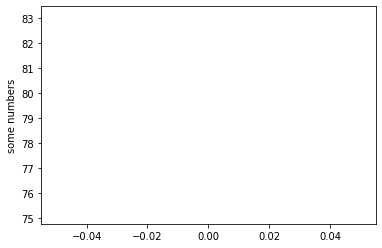

[79.12719891745603]

In [ ]:
plt.plot(accuracies)
plt.ylabel('some numbers')
plt.show()

accuracies


In [ ]:
prepared_input = tokenizer.prepare_seq2seq_batch(["You are fine"], return_tensors='pt')
model = model.to('cpu')
model.eval()
model_output = model(**prepared_input)
prediction = np.argmax(model_output.logits[0].detach().numpy())

print(prediction)

prediction_str = index_to_labels[prediction]

# if prediction_str in labelsPositive:
#      #print(labelsPositive[prediction])
#       print("Positive Emotion")

# elif prediction_str in labelsNegative:
#     #print(labelsNegative[prediction])
#     print("Negative Emotion")

# else:
#   print("Neutral")

index_to_labels_positive_negative[prediction]

1


'Positive'

# Your work

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)




Mounted at /content/drive


prQs 1. Can you report how accuracy changes with varying the hypyerparameters defined above? How does accuracy change with increasing number of epochs? Learning rate? Mention your final choice of parameters and graph how they impact accuracy. 

Qs 2. Try any 2 other models for sequence classification supported by Huggingface and repeat Qs 1 for these. You can find a full list of these [here](https://huggingface.co/transformers/model_doc/auto.html#automodelforsequenceclassification). (For those of you working with text for your project, you may also find several other useful models for Seq2Seq modeling, question answering, etc.)

Qs 3. Wrangle / change the data so that you can instead build a "positive" emotion vs "negative" emotions classifier, by combining labels. For any emotions that you feel are too neutral, you may drop them from evaluation. Can you now report the accuracy of a classifer on this data? You may use one of the model architectures from (1) or (2)

Qs 4. Export models from qs 1 and 3, and build a FastAPI around it, as discussed in class, which returns the most likely emotion found. (You may need to look up Huggingface documentation on how to save and load models). In particular, you should support two API endpoints - "detect_emotion_binary" and "detect_emotion_full" which supports each model.

Qs 5. Finally, can you dockerize this? You do NOT need to deploy this to the cloud.

Submission instructions: Zip your compiled .ipynb notebook, your fast_api code and your dockerfile, and submit to LMS as one file. You should confirm that your .ipynb can be imported to colab and run in sequence. All your results for Qs 1-3 should be reported in the notebook itself.

In [ ]:

# [func for func in dir(model) if callable(getattr(model, func)) and "save" in func]
# [func for func in dir(Trainer) if callable(getattr(Trainer, func))]
model_dir = '/content/drive/My Drive/Colab Notebooks/models/'
model.save_pretrained(model_dir + 'my_model.h5')